In [4]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

In [5]:
# Load the Loan data

Data = pd.read_csv(r"C:\Users\SRAVANI\Downloads\avocado1.csv", header=0)

# Copy to back-up file

Data_bk = Data.copy()

# Display first 5 values

Data.head(20)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,1/11/2015,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.00,conventional,2015,Albany
2,1/18/2015,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.00,conventional,2015,Albany
3,1/25/2015,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.00,conventional,2015,Albany
4,2/1/2015,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.00,conventional,2015,Albany
5,2/8/2015,0.99,51253.97,1357.37,39111.81,163.25,10621.54,10113.10,508.44,0.00,conventional,2015,Albany
6,2/15/2015,1.06,41567.62,986.66,30045.51,222.42,10313.03,9979.87,333.16,0.00,conventional,2015,Albany
7,2/22/2015,1.07,45675.05,1088.38,35056.13,151.00,9379.54,9000.16,379.38,0.00,conventional,2015,Albany
8,3/1/2015,0.99,55595.74,629.46,45633.34,181.49,9151.45,8986.06,165.39,0.00,conventional,2015,Albany
9,3/8/2015,1.07,40507.36,795.68,30370.64,159.05,9181.99,8827.55,354.44,0.00,conventional,2015,Albany


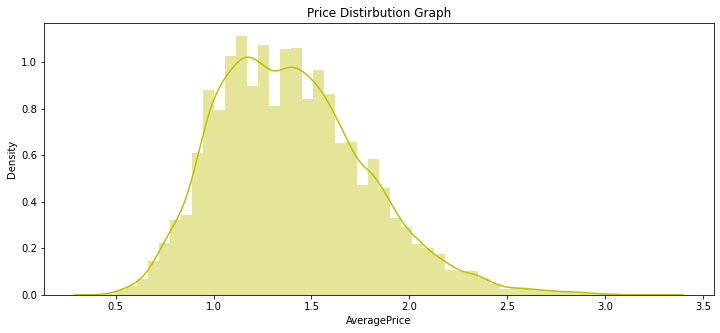

In [6]:
plt.figure(figsize=(12,5))
plt.title("Price Distirbution Graph")
ax = sns.distplot(Data["AveragePrice"], color = 'y')


Text(0.5, 1.0, 'Average Price')

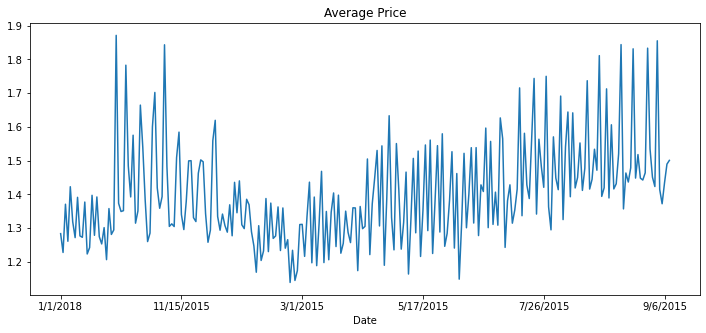

In [7]:
dategroup=Data.groupby('Date').mean()
plt.figure(figsize=(12,5))
dategroup['AveragePrice'].plot(x=Data.Date)
plt.title('Average Price')

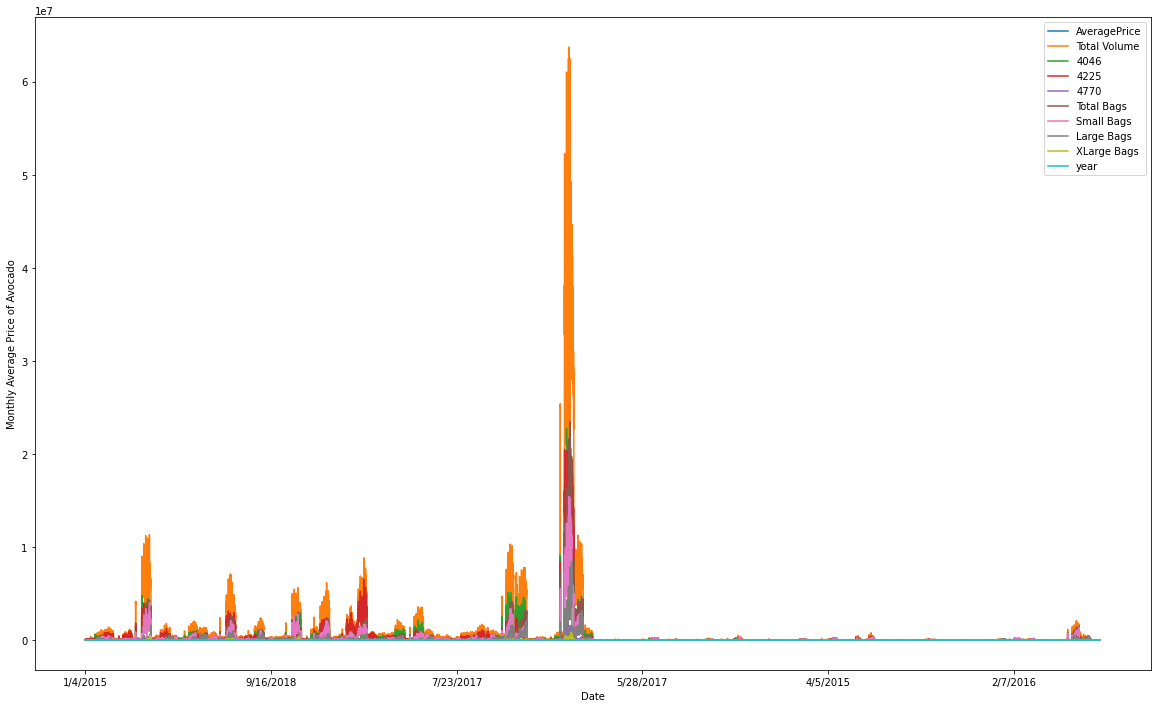

In [8]:
ax = Data.set_index('Date').plot(figsize=(20, 12))
ax.set_ylabel('Monthly Average Price of Avocado')
ax.set_xlabel('Date')

plt.show()

Text(0.5, 1.0, 'Type Average Price in Each Region')

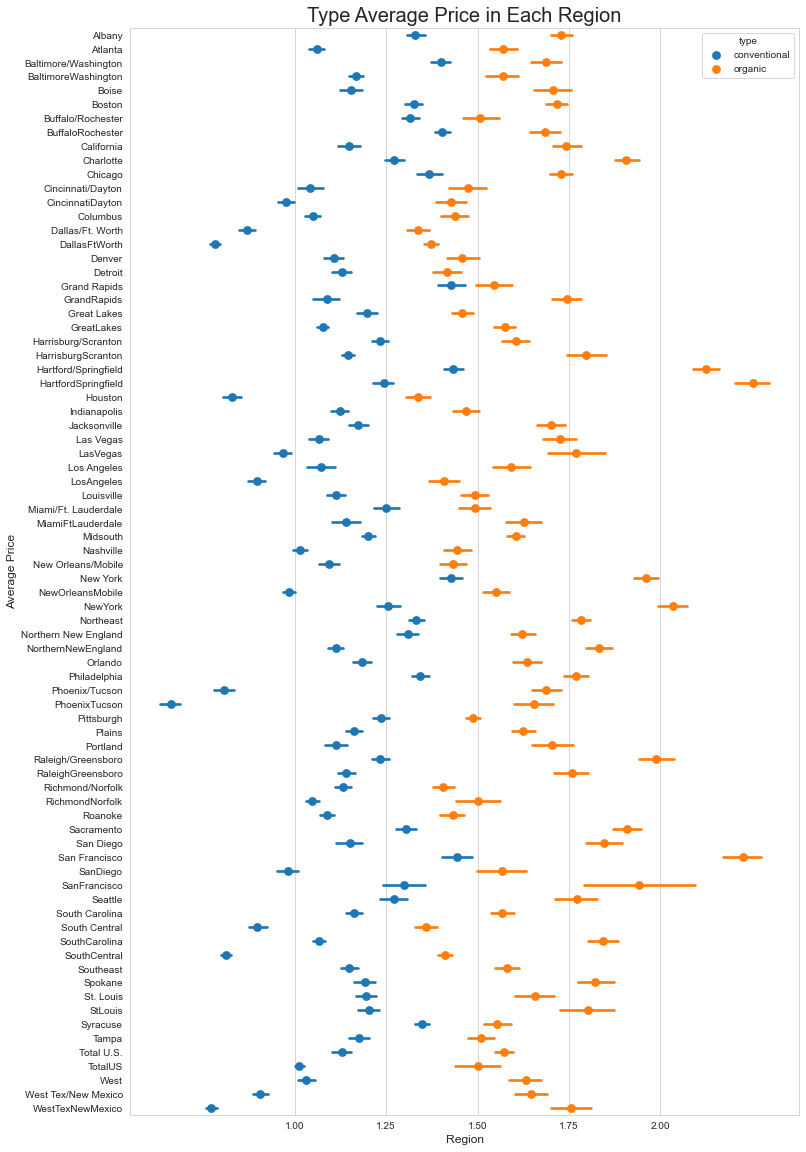

In [9]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='region',data=Data, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('Average Price',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

In [10]:
Data['Date']=pd.to_datetime(Data['Date'])
Data['Month']=Data['Date'].apply(lambda x:x.month)
Data['Day']=Data['Date'].apply(lambda x:x.day)
Data.drop(columns=['Date','Total Bags'],inplace = True)
Data

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,1.22,40873.28,2819.50,28287.42,49.90,9186.93,529.53,0.0,conventional,2015,Albany,1,4
1,1.24,41195.08,1002.85,31640.34,127.12,8036.04,388.73,0.0,conventional,2015,Albany,1,11
2,1.17,44511.28,914.14,31540.32,135.77,11651.09,269.96,0.0,conventional,2015,Albany,1,18
3,1.06,45147.50,941.38,33196.16,164.14,10103.35,742.47,0.0,conventional,2015,Albany,1,25
4,0.99,70873.60,1353.90,60017.20,179.32,9170.82,152.36,0.0,conventional,2015,Albany,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27318,1.97,6249.43,1733.40,2873.92,30.95,1590.00,21.16,0.0,organic,2015,WestTexNewMexico,11,22
27319,2.08,4638.10,1395.02,2238.04,61.71,943.33,0.00,0.0,organic,2015,WestTexNewMexico,11,29
27320,1.80,7836.65,2194.49,2981.01,25.97,2598.45,36.73,0.0,organic,2015,WestTexNewMexico,12,13
27321,1.92,6255.19,1512.45,2407.32,11.78,2213.72,109.92,0.0,organic,2015,WestTexNewMexico,12,20


In [11]:
Data.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
Day             0
dtype: int64

In [12]:
Data['type'].value_counts()

conventional    13662
organic         13661
Name: type, dtype: int64

conventional    13662
organic         13661
Name: type, dtype: int64


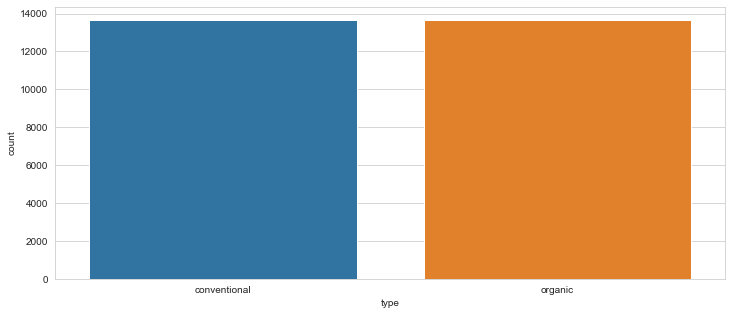

In [13]:
print(Data['type'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(Data['type'])
plt.show()

In [14]:
from sklearn import preprocessing 
 
label_encoder = preprocessing.LabelEncoder() 
Data['type']= label_encoder.fit_transform(Data['type']) 
 


In [15]:

# Display the information of dataset

Data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27323 entries, 0 to 27322
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  27323 non-null  float64
 1   Total Volume  27323 non-null  float64
 2   4046          27323 non-null  float64
 3   4225          27323 non-null  float64
 4   4770          27323 non-null  float64
 5   Small Bags    27323 non-null  float64
 6   Large Bags    27323 non-null  float64
 7   XLarge Bags   27323 non-null  float64
 8   type          27323 non-null  int32  
 9   year          27323 non-null  int64  
 10  region        27323 non-null  object 
 11  Month         27323 non-null  int64  
 12  Day           27323 non-null  int64  
dtypes: float64(8), int32(1), int64(3), object(1)
memory usage: 2.6+ MB


In [16]:
Data['region'] = pd.Categorical(Data['region'])
Data= pd.get_dummies(Data, prefix=["region"], columns=["region"], drop_first = True)

In [17]:
Data.head()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,region_Atlanta,region_Baltimore/Washington,region_BaltimoreWashington,region_Boise,region_Boston,region_Buffalo/Rochester,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_Cincinnati/Dayton,region_CincinnatiDayton,region_Columbus,region_Dallas/Ft. Worth,region_DallasFtWorth,region_Denver,region_Detroit,region_Grand Rapids,region_GrandRapids,region_Great Lakes,region_GreatLakes,region_Harrisburg/Scranton,region_HarrisburgScranton,region_Hartford/Springfield,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_Las Vegas,region_LasVegas,region_Los Angeles,region_LosAngeles,region_Louisville,region_Miami/Ft. Lauderdale,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_New Orleans/Mobile,region_New York,region_NewOrleansMobile,region_NewYork,region_Northeast,region_Northern New England,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_Phoenix/Tucson,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_Raleigh/Greensboro,region_RaleighGreensboro,region_Richmond/Norfolk,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_San Diego,region_San Francisco,region_SanDiego,region_SanFrancisco,region_Seattle,region_South Carolina,region_South Central,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_St. Louis,region_StLouis,region_Syracuse,region_Tampa,region_Total U.S.,region_TotalUS,region_West,region_West Tex/New Mexico,region_WestTexNewMexico
0,1.22,40873.28,2819.50,28287.42,49.90,9186.93,529.53,0.0,0,2015,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.24,41195.08,1002.85,31640.34,127.12,8036.04,388.73,0.0,0,2015,1,11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.17,44511.28,914.14,31540.32,135.77,11651.09,269.96,0.0,0,2015,1,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.06,45147.50,941.38,33196.16,164.14,10103.35,742.47,0.0,0,2015,1,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0.99,70873.60,1353.90,60017.20,179.32,9170.82,152.36,0.0,0,2015,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
Data.isnull().sum()

AveragePrice                  0
Total Volume                  0
4046                          0
4225                          0
4770                          0
                             ..
region_Total U.S.             0
region_TotalUS                0
region_West                   0
region_West Tex/New Mexico    0
region_WestTexNewMexico       0
Length: 89, dtype: int64

In [19]:
Data.describe()

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,region_Atlanta,region_Baltimore/Washington,region_BaltimoreWashington,region_Boise,region_Boston,region_Buffalo/Rochester,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_Cincinnati/Dayton,region_CincinnatiDayton,region_Columbus,region_Dallas/Ft. Worth,region_DallasFtWorth,region_Denver,region_Detroit,region_Grand Rapids,region_GrandRapids,region_Great Lakes,region_GreatLakes,region_Harrisburg/Scranton,region_HarrisburgScranton,region_Hartford/Springfield,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_Las Vegas,region_LasVegas,region_Los Angeles,region_LosAngeles,region_Louisville,region_Miami/Ft. Lauderdale,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_New Orleans/Mobile,region_New York,region_NewOrleansMobile,region_NewYork,region_Northeast,region_Northern New England,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_Phoenix/Tucson,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_Raleigh/Greensboro,region_RaleighGreensboro,region_Richmond/Norfolk,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_San Diego,region_San Francisco,region_SanDiego,region_SanFrancisco,region_Seattle,region_South Carolina,region_South Central,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_St. Louis,region_StLouis,region_Syracuse,region_Tampa,region_Total U.S.,region_TotalUS,region_West,region_West Tex/New Mexico,region_WestTexNewMexico
count,27323.000000,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000,27323.000000
mean,1.400632,9.135469e+05,2.953187e+05,2.901059e+05,2.215868e+04,2.186982e+05,8.202537e+04,5150.387571,0.499982,2016.956593,6.319694,15.426783,0.018519,0.014713,0.003806,0.018519,0.018519,0.014713,0.003806,0.018519,0.018519,0.018519,0.014713,0.003806,0.018519,0.014713,0.003806,0.018519,0.018519,0.014713,0.003806,0.014713,0.003806,0.014713,0.003806,0.014713,0.003806,0.018519,0.018519,0.018519,0.014713,0.003806,0.014713,0.003806,0.018519,0.014713,0.003806,0.018519,0.018519,0.014713,0.014713,0.003806,0.003806,0.018519,0.014713,0.003806,0.018519,0.018519,0.014713,0.003806,0.018519,0.018519,0.018519,0.014713,0.003806,0.014713,0.003806,0.018519,0.018519,0.014713,0.014713,0.003806,0.003806,0.018519,0.014713,0.014713,0.003806,0.003806,0.018519,0.018519,0.014713,0.003806,0.018519,0.018519,0.014713,0.003806,0.018519,0.014713,0.003770
std,0.385439,3.702672e+06,1.273010e+06,1.187227e+06,1.031329e+05,8.881292e+05,3.917356e+05,30719.207766,0.500009,1.406539,3.364104,8.795354,0.134822,0.120403,0.061579,0.134822,0.134822,0.120403,0.061579,0.134822,0.134822,0.134822,0.120403,0.061579,0.134822,0.120403,0.061579,0.134822,0.134822,0.120403,0.061579,0.120403,0.061579,0.120403,0.061579,0.120403,0.061579,0.134822,0.134822,0.

In [20]:
IndepVar = []
for col in Data.columns:
    if col != 'AveragePrice':
        IndepVar.append(col)

TargetVar = 'AveragePrice'

x = Data[IndepVar]
y = Data[TargetVar]

In [21]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((19126, 88), (8197, 88), (19126,), (8197,))

In [22]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train= mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [23]:
# Load the result dataset

EMResults = pd.read_csv(r"C:\Users\SRAVANI\Downloads\coderesults.csv", header=0)
EMResults.head()

,Model Name,Explained_variance,R2,Mean_Absolute_Error,Mean_Squared_Error,Root_Mean_Squared_Error,Accuracy,Standard Deviation


In [24]:
import sklearn.metrics as metrics

def regression_results(y_true, y_pred):
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    r2=metrics.r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1-r2)*(len(y_true)-1)/(len(y_true)-x_test.shape[1]-1)

    print('Explained_variance: ', round(explained_variance,4))    
    print('R2: ', round(r2,4))
    print('Adjusted_r2: ', round(adjusted_r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [25]:
from sklearn.model_selection import cross_val_score
def model_accuracy(model,x_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model,  X= x_train, y = y_train, cv = 10)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [26]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)
y_pred = regressor.predict(x_test)
regression_results(y_test,y_pred)
model_accuracy(regressor)

Explained_variance:  -1.6986
R2:  -1.8469
Adjusted_r2:  -1.8778
MAE:  0.2999
MSE:  0.4274
RMSE:  0.6537
Accuracy: 55.13 %
Standard Deviation: 1.60 %


In [27]:
from sklearn.ensemble import RandomForestRegressor

rand_regressor = RandomForestRegressor()
rand_regressor.fit(x_train, y_train)
y_pred_rf = rand_regressor.predict(x_test)
regression_results(y_test,y_pred_rf)
model_accuracy(rand_regressor)

Explained_variance:  0.8594
R2:  0.854
Adjusted_r2:  0.8524
MAE:  0.1071
MSE:  0.0219
RMSE:  0.148
Accuracy: 88.61 %
Standard Deviation: 0.59 %


In [28]:
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor(criterion='mse',splitter='random',random_state=10)
decision_tree.fit(x_train, y_train)
y_pred_dt = decision_tree.predict(x_test)
regression_results(y_test,y_pred_dt)
model_accuracy(decision_tree)

Explained_variance:  0.7928
R2:  0.7862
Adjusted_r2:  0.7839
MAE:  0.124
MSE:  0.0321
RMSE:  0.1792
Accuracy: 80.12 %
Standard Deviation: 1.59 %


In [29]:
from sklearn.svm import SVR

svr=SVR(kernel='rbf')
svr.fit(x_train, y_train)
y_pred_dt = svr.predict(x_test)
regression_results(y_test,y_pred_dt)
model_accuracy(svr)

Explained_variance:  0.6934
R2:  0.69
Adjusted_r2:  0.6867
MAE:  0.1556
MSE:  0.0465
RMSE:  0.2157
Accuracy: 69.71 %
Standard Deviation: 1.62 %


In [31]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [30]:
import lightgbm as lgb

lgbr_tree=lgb.LGBMRegressor()
lgbr_tree.fit(x_train, y_train)
y_pred_dt = lgbr_tree.predict(x_test)
regression_results(y_test,y_pred_dt)
model_accuracy(lgbr_tree)

Explained_variance:  0.838
R2:  0.8341
Adjusted_r2:  0.8323
MAE:  0.1181
MSE:  0.0249
RMSE:  0.1578
Accuracy: 85.46 %
Standard Deviation: 0.63 %


In [31]:
from sklearn.ensemble import ExtraTreesRegressor
ETR=ExtraTreesRegressor()
ETR.fit(x_train, y_train)
y_pred_dt = ETR.predict(x_test)
regression_results(y_test,y_pred_dt)
model_accuracy(ETR)

Explained_variance:  0.9098
R2:  0.9052
Adjusted_r2:  0.9042
MAE:  0.085
MSE:  0.0142
RMSE:  0.1193
Accuracy: 91.63 %
Standard Deviation: 0.54 %


In [35]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [32]:
import xgboost as xgb
ETR=xgb.XGBRegressor()
ETR.fit(x_train, y_train)
y_pred_dt = ETR.predict(x_test)
regression_results(y_test,y_pred_dt)
model_accuracy(ETR)

Explained_variance:  0.8595
R2:  0.8483
Adjusted_r2:  0.8466
MAE:  0.112
MSE:  0.0228
RMSE:  0.1509
Accuracy: 88.27 %
Standard Deviation: 0.77 %


In [31]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
grid_search = GridSearchCV(ExtraTreesRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1
                           )
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 342 candidates, totalling 1710 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=0), n_jobs=-1,
             param_grid={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
             scoring='r2', verbose=1)

In [37]:
random_search = RandomizedSearchCV(ExtraTreesRegressor(random_state=0),
                           {
                              'n_estimators':np.arange(5,100,5),
                              'max_features':np.arange(0.1,1.0,0.05),
                            },cv=5, scoring="r2",verbose=1,n_jobs=-1, 
                             n_iter=50, random_state = 0
                           )
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=0),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'max_features': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                                        'n_estimators': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85,
       90, 95])},
                   random_state=0, scoring='r2', verbose=1)

In [ ]:
modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelETR = ExtraTreesRegressor()
modelLGBMR=lgb.LGBMRegressor()

#x=regression_results(y_true, y_pred)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelSVR, modelXGR, modelETR,modelLGBMR]
for models in MM:
    models.fit(x_train, y_train)
    y_pred_dt = models.predict(x_test)
    new_row = {'Model Name' : models,
               'Explained_variance': metrics.explained_variance_score(y_test,y_pred_dt),
               'R2': metrics.r2_score(y_test,y_pred_dt),
               'Mean_Absolute_Error': metrics.mean_absolute_error(y_test, y_pred_dt),  
               'Mean_Squared_Error':  metrics.mean_squared_error(y_test, y_pred_dt),
               'Root_Mean_Squared_Error':   np.sqrt(metrics.mean_squared_error(y_test, y_pred_dt)),
               'Accuracy': cross_val_score(estimator = models,  X= x_train, y = y_train, cv = 10).mean()*100,
               'Standard Deviation':cross_val_score(estimator = models,  X= x_train, y = y_train, cv = 10).std()*100}
    EMResults = EMResults.append(new_row, ignore_index=True)

In [ ]:
EMResults.head(20)

In [ ]:
# Results with comparing the all the algorithms 

EMResults.to_csv("C://Users//KITTU//Downloads//EMResults_1.csv")



In [33]:
y_pred = ETR.predict(x_test)

In [35]:
Results = pd.DataFrame({'result_A':y_test, 'result_P':y_pred})

# Merge two Dataframes on index of both the dataframes

ResultsFinal = Data.merge(Results, left_index=True, right_index=True)
ResultsFinal.sample(10)

,AveragePrice,Total Volume,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day,region_Atlanta,region_Baltimore/Washington,region_BaltimoreWashington,region_Boise,region_Boston,region_Buffalo/Rochester,region_BuffaloRochester,region_California,region_Charlotte,region_Chicago,region_Cincinnati/Dayton,region_CincinnatiDayton,region_Columbus,region_Dallas/Ft. Worth,region_DallasFtWorth,region_Denver,region_Detroit,region_Grand Rapids,region_GrandRapids,region_Great Lakes,region_GreatLakes,region_Harrisburg/Scranton,region_HarrisburgScranton,region_Hartford/Springfield,region_HartfordSpringfield,region_Houston,region_Indianapolis,region_Jacksonville,region_Las Vegas,region_LasVegas,region_Los Angeles,region_LosAngeles,region_Louisville,region_Miami/Ft. Lauderdale,region_MiamiFtLauderdale,region_Midsouth,region_Nashville,region_New Orleans/Mobile,region_New York,region_NewOrleansMobile,region_NewYork,region_Northeast,region_Northern New England,region_NorthernNewEngland,region_Orlando,region_Philadelphia,region_Phoenix/Tucson,region_PhoenixTucson,region_Pittsburgh,region_Plains,region_Portland,region_Raleigh/Greensboro,region_RaleighGreensboro,region_Richmond/Norfolk,region_RichmondNorfolk,region_Roanoke,region_Sacramento,region_San Diego,region_San Francisco,region_SanDiego,region_SanFrancisco,region_Seattle,region_South Carolina,region_South Central,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_St. Louis,region_StLouis,region_Syracuse,region_Tampa,region_Total U.S.,region_TotalUS,region_West,region_West Tex/New Mexico,region_WestTexNewMexico,result_A,result_P
8691,1.27,91298.63,28022.65,40377.82,1331.35,20132.05,1434.76,0.00,0,2016,9,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.27,1.278744
5728,1.00,3323658.31,1082180.70,434882.12,140115.79,1420243.50,84173.24,162062.96,0,2019,3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.00,0.874310
25290,1.52,65708.30,30226.86,4503.52,0.00,30802.10,175.82,0.00,1,2015,10,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1.52,1.435541
8955,1.09,1676509.02,946350.29,349760.60,3190.05,325851.34,43201.73,8155.01,0,2016,12,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.09,1.058981
25718,1.60,5305.01,461.71,2076.61,0.00,755.97,2010.72,0.00,1,2018,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.60,1.599002
16704,1.44,19660.58,2347.47,7061.55,12.76,953.33,9285.47,0.00,1,2015,2,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.44,1.264380
17960,2.00,4330.23,68.06,235.65,19.56,1597.46,2409.50,0.00,1,2015,12,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.00,1.418479
3181,1.57,537139.26,126304.77,158787.10,711.14,98271.86,153064.39,0.00,0,2017,10,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.57,1.431404
18559,1.97,3007.07,177.86,1376.52,0.00,793.58,659.11,0.00,1,2016,9,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.97,1.629806
11015,1.81,438236.06,108558.45,159897.73,558.27,104087.06,64712.10,422.45,0,2017,8,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,